<a href="https://colab.research.google.com/github/meryzennn/JKN-Mobile-Sentiment-Analysis/blob/main/sentimen_knn%2Csvm%2Cnaive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SCRAPING DATA***
---



In [1]:
! pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.0 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app,reviews
import pandas as pd
import datetime

In [3]:
from google_play_scraper import reviews, Sort

app_id = 'app.bpjs.mobile'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Gagal mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'b69f2fef-f56d-46ee-b47c-c95aec23981a', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'aplikasi busuk otp no HP gak muncul"', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '4.12.0', 'at': datetime.datetime(2025, 5, 25, 12, 47, 44), 'replyContent': None, 'repliedAt': None, 'appVersion': '4.12.0'}


In [4]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_mobile_jkn.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']
        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

# Panggil fungsi ekspor
export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_mobile_jkn.csv'


In [5]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_mobile_jkn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [6]:
data.head(20)

,Review ID,Username,Rating,Review Text,Date
0,b69f2fef-f56d-46ee-b47c-c95aec23981a,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",2025-05-25 12:47:44
1,f554b61f-f955-4706-a3bd-395c13d68e3e,Pengguna Google,4,oke,2025-05-25 12:35:54
2,2cedf630-11a6-4779-b50d-1e8acdba34bb,Pengguna Google,5,baik,2025-05-25 12:23:24
3,c2a36c75-2241-432b-a787-61df89fe9987,Pengguna Google,5,Ok..,2025-05-25 12:18:25
4,b49f322c-5882-4860-bfe1-15e81bc2a530,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,2025-05-25 12:11:24
5,08bd731c-a9e7-40db-ac59-ffe52ab18044,Pengguna Google,5,alhamdulilah penanganan gratis,2025-05-25 12:11:12
6,db259ec0-a757-4703-b7ac-ae6030ae580b,Pengguna Google,5,sangat membantu .semoga semakin maju dan cangg...,2025-05-25 11:40:55
7,e9db97fa-be7e-46ee-a0a9-ce638c2721ff,Pengguna Google,4,layanan memuaskan,2025-05-25 11:40:06
8,3ac1b010-8df8-4c48-ba5c-fd1eea10072a,Pengguna Google,2,"plisss deh yaaa tolong jangan di persulit, tol...",2025-05-25 11:33:11
9,73b393c1-329c-4d60-ad45-0d3f265face2,Pengguna Google,5,semoga BPJS bisa membantu orang orang yang sus...,2025-05-25 11:24:18


# ***PREPROCESSING DATA***
---



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_mobile_jkn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [9]:
data.head(10)

,Review ID,Username,Rating,Review Text,Date
0,b69f2fef-f56d-46ee-b47c-c95aec23981a,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",2025-05-25 12:47:44
1,f554b61f-f955-4706-a3bd-395c13d68e3e,Pengguna Google,4,oke,2025-05-25 12:35:54
2,2cedf630-11a6-4779-b50d-1e8acdba34bb,Pengguna Google,5,baik,2025-05-25 12:23:24
3,c2a36c75-2241-432b-a787-61df89fe9987,Pengguna Google,5,Ok..,2025-05-25 12:18:25
4,b49f322c-5882-4860-bfe1-15e81bc2a530,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,2025-05-25 12:11:24
5,08bd731c-a9e7-40db-ac59-ffe52ab18044,Pengguna Google,5,alhamdulilah penanganan gratis,2025-05-25 12:11:12
6,db259ec0-a757-4703-b7ac-ae6030ae580b,Pengguna Google,5,sangat membantu .semoga semakin maju dan cangg...,2025-05-25 11:40:55
7,e9db97fa-be7e-46ee-a0a9-ce638c2721ff,Pengguna Google,4,layanan memuaskan,2025-05-25 11:40:06
8,3ac1b010-8df8-4c48-ba5c-fd1eea10072a,Pengguna Google,2,"plisss deh yaaa tolong jangan di persulit, tol...",2025-05-25 11:33:11
9,73b393c1-329c-4d60-ad45-0d3f265face2,Pengguna Google,5,semoga BPJS bisa membantu orang orang yang sus...,2025-05-25 11:24:18


In [10]:
df = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul"""
1,2025-05-25 12:35:54,Pengguna Google,4,oke
2,2025-05-25 12:23:24,Pengguna Google,5,baik
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [12]:
df.drop_duplicates(subset = "Review Text", keep = 'first', inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7275 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         7275 non-null   object
 1   Username     7275 non-null   object
 2   Rating       7275 non-null   int64 
 3   Review Text  7275 non-null   object
dtypes: int64(1), object(3)
memory usage: 284.2+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

---



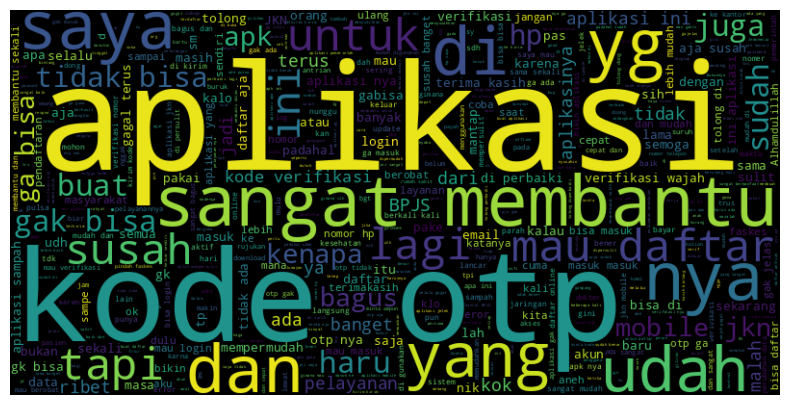

In [47]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '…', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**FREKUENSI KATA**

---



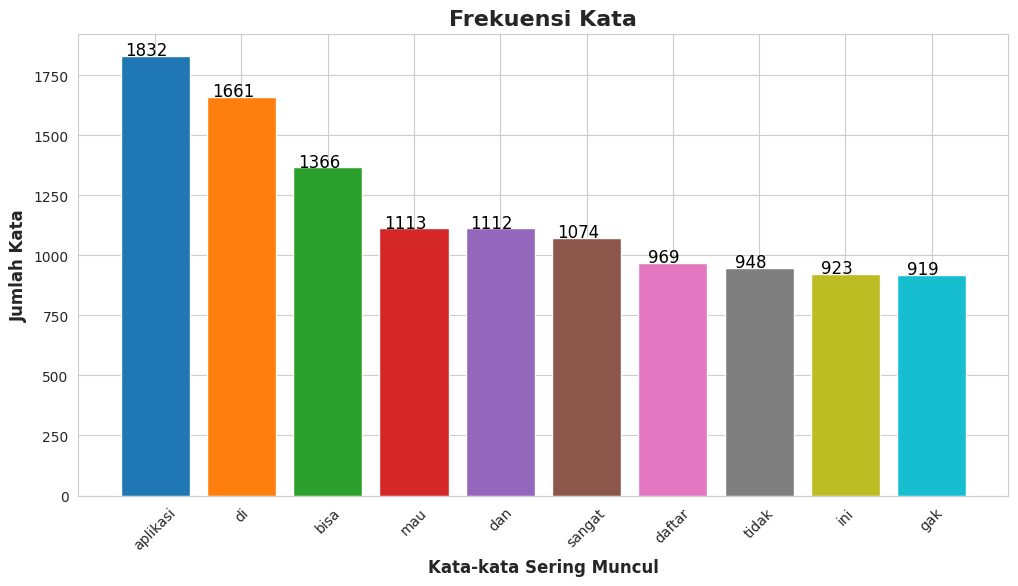

In [48]:
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df['Review Text'])

tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


**PROSES CLEANING**

---



In [49]:
import re
import string
import nltk

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Additional emoticons
            u"\U000024C2-\U0001F251"  # flags
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^A-Za-z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"['aplikasi', 'busuk', 'otp', 'no', 'hp', 'tida...","['aplikasi', 'busuk', 'otp', 'no', 'hp', 'munc...",aplikasi busuk otp no hp muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,['oke'],['oke'],oke
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,['ok'],['ok'],ok
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"['bagus', 'sangat', 'membantu', 'untuk', 'meli...","['bagus', 'membantu', 'update', 'kepesertaan']",bagus bantu update serta
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"['alhamdulilah', 'penanganan', 'gratis']","['alhamdulilah', 'penanganan', 'gratis']",alhamdulilah tangan gratis
6,2025-05-25 11:40:55,Pengguna Google,5,sangat membantu .semoga semakin maju dan cangg...,sangat membantu semoga semakin maju dan canggi...,sangat membantu semoga semakin maju dan canggi...,sangat membantu semoga semakin maju dan canggi...,"['sangat', 'membantu', 'semoga', 'semakin', 'm...","['membantu', 'semoga', 'maju', 'canggih']",bantu moga maju canggih
7,2025-05-25 11:40:06,Pengguna Google,4,layanan memuaskan,layanan memuaskan,layanan memuaskan,layanan memuaskan,"['layanan', 'memuaskan']","['layanan', 'memuaskan']",layan muas
8,2025-05-25 11:33:11,Pengguna Google,2,"plisss deh yaaa tolong jangan di persulit, tol...",plisss deh yaaa tolong jangan di persulit tolo...,plisss deh yaaa tolong jangan di persulit tolo...,plisss deh ya tolong jangan di persulit tolong...,"['plisss', 'deh', 'ya', 'tolong', 'jangan', 'd...","['plisss', 'deh', 'ya', 'tolong', 'persulit', ...",plisss deh ya tolong sulit tolong baik pasword...
9,2025-05-25 11:24:18,Pengguna Google,5,semoga BPJS bisa membantu orang orang yang sus...,semoga BPJS bisa membantu orang orang yang sus...,semoga bpjs bisa membantu orang orang yang sus...,semoga bpjs bisa membantu orang orang yang sus...,"['semoga', 'bpjs', 'bisa', 'membantu', 'orang'...","['semoga', 'bpjs', 'membantu', 'orang', 'orang...",moga bpjs bantu orang orang susah sulit
10,2025-05-25 11:04:31,Pengguna Google,2,ko saya gagal terus ya veripikasi wajah nya,ko saya gagal terus ya veripikasi wajah nya,ko saya gagal terus ya veripikasi wajah nya,kok saya gagal terus ya veripikasi wajah ya,"['kok', 'saya', 'gagal', 'terus', 'ya', 'verip...","['gagal', 'ya', 'veripikasi', 'wajah', 'ya']",gagal ya veripikasi wajah ya


**PROSES CASE FOLDING**

---



In [50]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"['aplikasi', 'busuk', 'otp', 'no', 'hp', 'tida...","['aplikasi', 'busuk', 'otp', 'no', 'hp', 'munc...",aplikasi busuk otp no hp muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,['oke'],['oke'],oke
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,['ok'],['ok'],ok
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"['bagus', 'sangat', 'membantu', 'untuk', 'meli...","['bagus', 'membantu', 'update', 'kepesertaan']",bagus bantu update serta
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"['alhamdulilah', 'penanganan', 'gratis']","['alhamdulilah', 'penanganan', 'gratis']",alhamdulilah tangan gratis


**NORMALISASI KATA**

---



In [51]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                    # replaced_words.append('<karakter eksplisit>')
                    # kalimat_baku.append(word)
            else:
                replaced_words.append(word)
                kalimat_baku.append(word)
        replaced_text = " ".join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [52]:
# Baca dataset
data = pd.DataFrame(df[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis


In [53]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [54]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

data.head(100)

df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis


**TOKENIZE**

---



In [55]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"[aplikasi, busuk, otp, no, hp, tidak, muncul]"
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,[oke]
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,[ok]
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"[bagus, sangat, membantu, untuk, melihat, upda..."
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"[alhamdulilah, penanganan, gratis]"


**STOPWROD REMOVAL**

---



In [56]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"[aplikasi, busuk, otp, no, hp, tidak, muncul]","[aplikasi, busuk, otp, no, hp, muncul]"
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,[oke],[oke]
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,[ok],[ok]
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"[bagus, sangat, membantu, untuk, melihat, upda...","[bagus, membantu, update, kepesertaan]"
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"[alhamdulilah, penanganan, gratis]","[alhamdulilah, penanganan, gratis]"


**PROSES STEAMING DATA**

---



In [58]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [59]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Terapkan stemming ke kolom 'stopword removal'
df['stemming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# Tampilkan 5 data teratas
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"[aplikasi, busuk, otp, no, hp, tidak, muncul]","[aplikasi, busuk, otp, no, hp, muncul]",aplikasi busuk otp no hp muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,[oke],[oke],oke
3,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,[ok],[ok],ok
4,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"[bagus, sangat, membantu, untuk, melihat, upda...","[bagus, membantu, update, kepesertaan]",bagus bantu update serta
5,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"[alhamdulilah, penanganan, gratis]","[alhamdulilah, penanganan, gratis]",alhamdulilah tangan gratis


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 7274
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7207 non-null   object
 1   Username          7207 non-null   object
 2   Rating            7207 non-null   int64 
 3   Review Text       7207 non-null   object
 4   cleaning          7207 non-null   object
 5   case_folding      7207 non-null   object
 6   normalisasi       7207 non-null   object
 7   tokenize          7207 non-null   object
 8   stopword removal  7207 non-null   object
 9   stemming_data     7207 non-null   object
dtypes: int64(1), object(9)
memory usage: 877.4+ KB


**PROSES HAPUS DATA BERNILAI KOSONG (NaN)**

---



In [63]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 7274
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7207 non-null   object
 1   Username          7207 non-null   object
 2   Rating            7207 non-null   int64 
 3   Review Text       7207 non-null   object
 4   cleaning          7207 non-null   object
 5   case_folding      7207 non-null   object
 6   normalisasi       7207 non-null   object
 7   tokenize          7207 non-null   object
 8   stopword removal  7207 non-null   object
 9   stemming_data     7207 non-null   object
dtypes: int64(1), object(9)
memory usage: 877.4+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



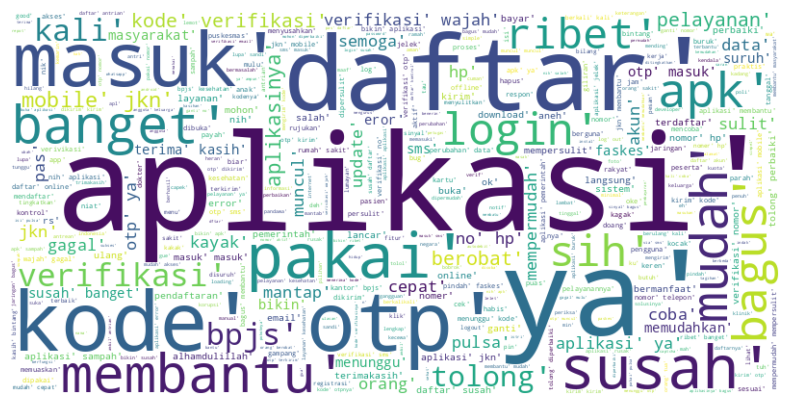

In [64]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



# Menggabungkan teks dari kolom 'stemming_data'
text = ' '.join(df['stopword removal'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya', 'gue', 'sih'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


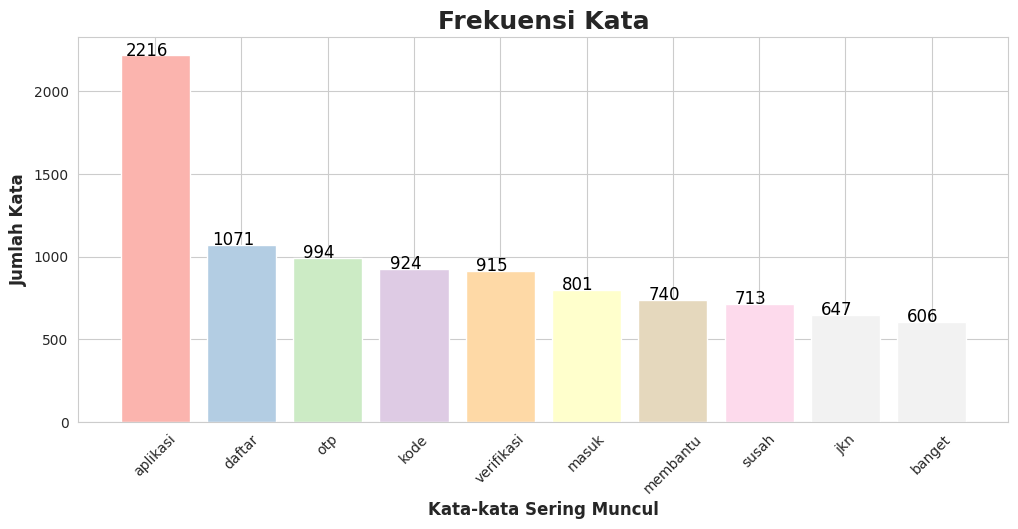

In [65]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Convert the list of words in 'stopword removal' to strings before joining
text = ' '.join([' '.join(words) for words in df["stopword removal"]])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()


In [67]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBELAN DATA***

---



In [68]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_Data1.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7207 entries, 0 to 7206
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7207 non-null   object
 1   Username          7207 non-null   object
 2   Rating            7207 non-null   int64 
 3   Review Text       7207 non-null   object
 4   cleaning          7207 non-null   object
 5   case_folding      7207 non-null   object
 6   normalisasi       7207 non-null   object
 7   tokenize          7207 non-null   object
 8   stopword removal  7207 non-null   object
 9   stemming_data     7207 non-null   object
dtypes: int64(1), object(9)
memory usage: 563.2+ KB


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-25 12:47:44,Pengguna Google,1,"aplikasi busuk otp no HP gak muncul""",aplikasi busuk otp no HP gak muncul,aplikasi busuk otp no hp gak muncul,aplikasi busuk otp no hp tidak muncul,"['aplikasi', 'busuk', 'otp', 'no', 'hp', 'tida...","['aplikasi', 'busuk', 'otp', 'no', 'hp', 'munc...",aplikasi busuk otp no hp muncul
1,2025-05-25 12:35:54,Pengguna Google,4,oke,oke,oke,oke,['oke'],['oke'],oke
2,2025-05-25 12:18:25,Pengguna Google,5,Ok..,Ok,ok,ok,['ok'],['ok'],ok
3,2025-05-25 12:11:24,Pengguna Google,5,baguss. sangat membantu untuk melihat update k...,baguss sangat membantu untuk melihat update ke...,baguss sangat membantu untuk melihat update ke...,bagus sangat membantu untuk melihat update kep...,"['bagus', 'sangat', 'membantu', 'untuk', 'meli...","['bagus', 'membantu', 'update', 'kepesertaan']",bagus bantu update serta
4,2025-05-25 12:11:12,Pengguna Google,5,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,alhamdulilah penanganan gratis,"['alhamdulilah', 'penanganan', 'gratis']","['alhamdulilah', 'penanganan', 'gratis']",alhamdulilah tangan gratis


In [69]:
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7207 entries, 0 to 7206
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7207 non-null   object
 1   Username          7207 non-null   object
 2   Rating            7207 non-null   int64 
 3   Review Text       7207 non-null   object
 4   cleaning          7207 non-null   object
 5   case_folding      7207 non-null   object
 6   normalisasi       7207 non-null   object
 7   tokenize          7207 non-null   object
 8   stopword removal  7207 non-null   object
 9   stemming_data     7207 non-null   object
dtypes: int64(1), object(9)
memory usage: 563.2+ KB


In [70]:
data = pd.DataFrame(data[['stemming_data', 'Rating']])
data.head(5)

,stemming_data,Rating
0,aplikasi busuk otp no hp muncul,1
1,oke,4
2,ok,5
3,bagus bantu update serta,5
4,alhamdulilah tangan gratis,5


In [71]:
data['Sentiment'] = data['Rating'].apply(lambda x: 'Negatif' if x <= 3 else 'Positif')
data.head()


,stemming_data,Rating,Sentiment
0,aplikasi busuk otp no hp muncul,1,Negatif
1,oke,4,Positif
2,ok,5,Positif
3,bagus bantu update serta,5,Positif
4,alhamdulilah tangan gratis,5,Positif


<ipython-input-72-460eb42ca53d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


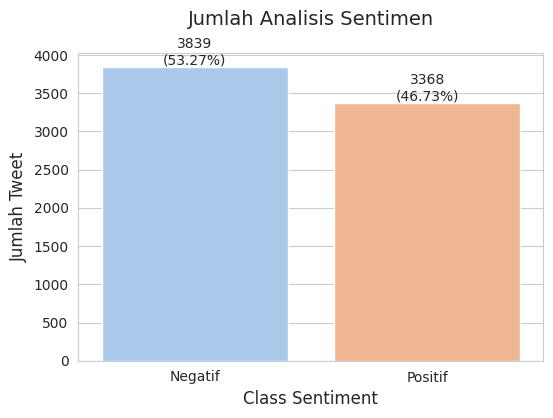

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()


In [74]:
data.to_csv('Hasil_Labeling_Data1.csv',encoding='utf8', index=False);

**WORDCLOUD**

---



In [75]:
import pandas as pd

data = pd.read_csv('Hasil_Labeling_Data1.csv')
data.head()

,stemming_data,Rating,Sentiment
0,aplikasi busuk otp no hp muncul,1,Negatif
1,oke,4,Positif
2,ok,5,Positif
3,bagus bantu update serta,5,Positif
4,alhamdulilah tangan gratis,5,Positif


In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')


In [40]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        random_state=42,
        max_font_size=100,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


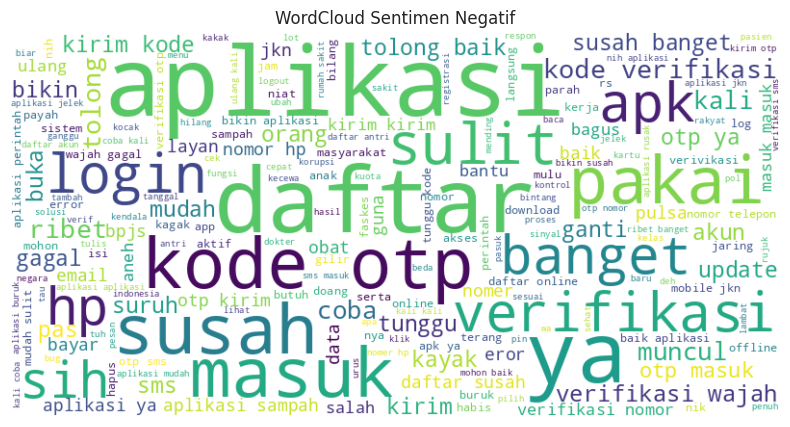

In [41]:
#Membuat Wordcloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

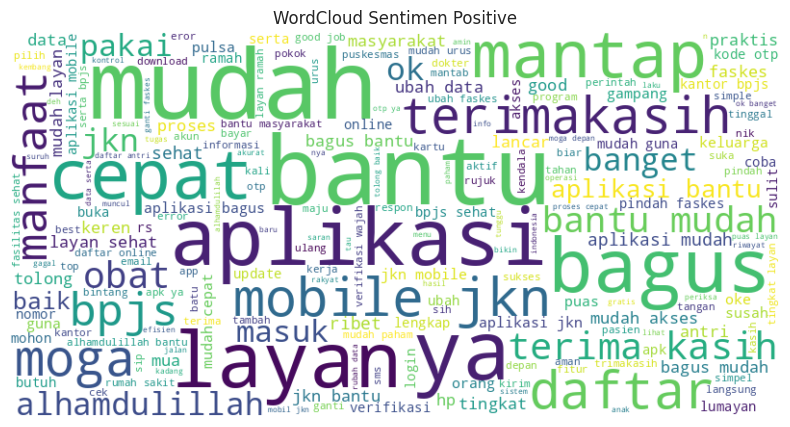

In [42]:
#Membuat Wordcloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positive')

# ***SVM,KNN,NAIVE BAYES***

---



In [ ]:
import pandas as pd

file_path = 'Hasil_Labeling_Data.csv'
df = pd.read_csv(file_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  7190 non-null   object
 1   Rating         7259 non-null   int64 
 2   Sentiment      7259 non-null   object
dtypes: int64(1), object(2)
memory usage: 170.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Buang data yang missing pada kolom 'stemming_data'
cleaned_data = data.dropna(subset=['stemming_data'])

# Pisahkan fitur dan label
X = cleaned_data['stemming_data']
y = cleaned_data['Sentiment']

# Bagi data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('==================')

# Vektorisasi teks dengan CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Tampilkan bentuk matriks hasil vektorisasi
X_train_vec.shape, X_test_vec.shape


Jumlah data latih: 5752
Jumlah data uji: 1438


((5752, 4755), (1438, 4755))

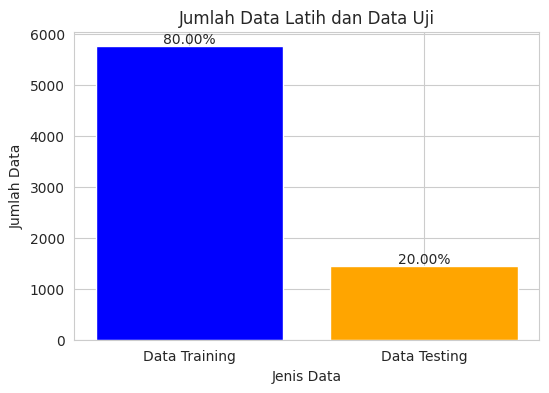

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data latih dan uji
train_size = len(X_train)
test_size = len(X_test)

# Buat bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'{(height / (train_size + test_size)) * 100:.2f}%',
             ha='center', va='bottom')

# Tambahkan judul dan label
plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB()
}

# Latih dan evaluasi model
results = {}

for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }



Confusion Matrix for SVM:


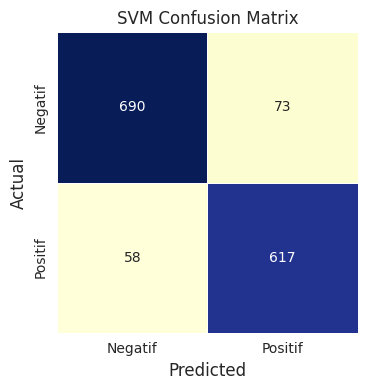


Confusion Matrix for KNN:


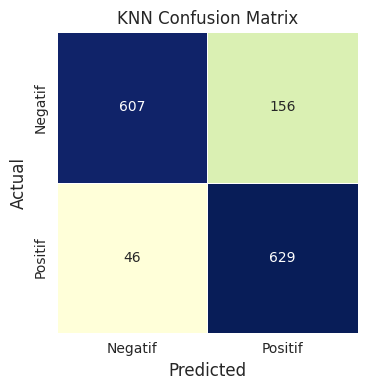


Confusion Matrix for Naive Bayes:


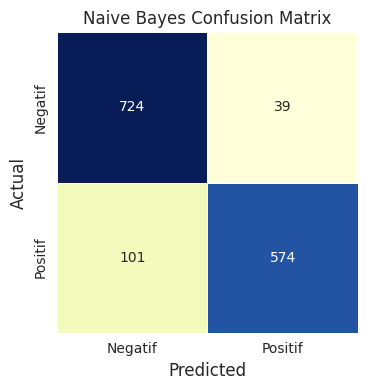

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        cbar=False,
        xticklabels=['Negatif', 'Positif'],
        yticklabels=['Negatif', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )

    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)

    plt.tight_layout()
    plt.show()


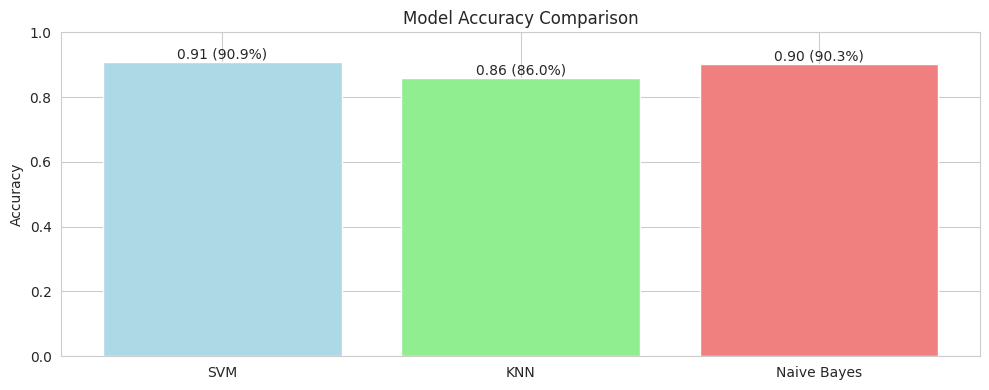

In [ ]:
import matplotlib.pyplot as plt

accuracies = {model: result["accuracy"] for model, result in results.items()}

plt.figure(figsize=(10, 4))
bars = plt.bar(
    list(accuracies.keys()),
    list(accuracies.values()),
    color=['lightblue', 'lightgreen', 'lightcoral', 'plum']
)

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f"{accuracy:.2f} ({accuracy * 100:.1f}%)",  # Tampilkan nilai akurasi dan persen
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Karena akurasi biasanya dalam skala 0–1
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)

    display(styled_df)



Classification Report for SVM:


,precision,recall,f1-score,support
Negatif,0.922,0.904,0.913,763.000
Positif,0.894,0.914,0.904,675.000
accuracy,0.909,0.909,0.909,0.909
macro avg,0.908,0.909,0.909,1438.000
weighted avg,0.909,0.909,0.909,1438.000



Classification Report for KNN:


,precision,recall,f1-score,support
Negatif,0.930,0.796,0.857,763.000
Positif,0.801,0.932,0.862,675.000
accuracy,0.860,0.860,0.860,0.860
macro avg,0.865,0.864,0.859,1438.000
weighted avg,0.869,0.860,0.859,1438.000



Classification Report for Naive Bayes:


,precision,recall,f1-score,support
Negatif,0.878,0.949,0.912,763.000
Positif,0.936,0.850,0.891,675.000
accuracy,0.903,0.903,0.903,0.903
macro avg,0.907,0.900,0.902,1438.000
weighted avg,0.905,0.903,0.902,1438.000


# ***RATING***

---



In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Labeling_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  7190 non-null   object
 1   Rating         7259 non-null   int64 
 2   Sentiment      7259 non-null   object
dtypes: int64(1), object(2)
memory usage: 170.3+ KB


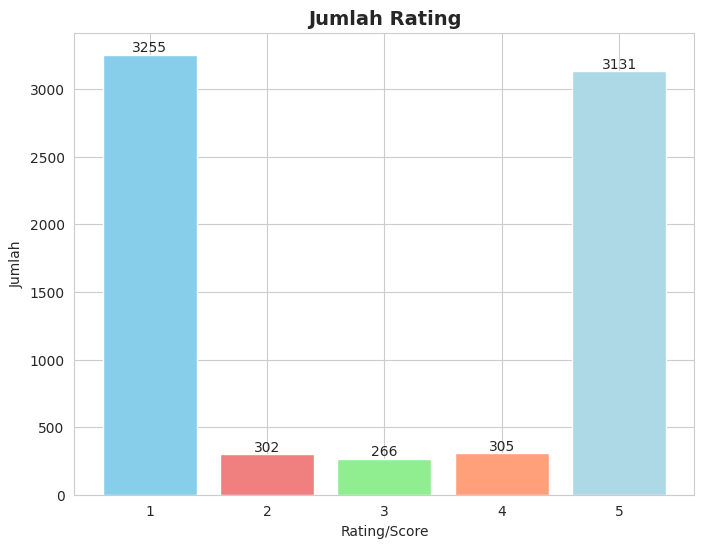

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()